<a href="https://colab.research.google.com/github/ABBAS-37405/PYTHON-AND-DATA-SCIENCE/blob/main/dataclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install numpy


In [2]:
#pip install scikit-learn

In [3]:
#pip install openpyxl
#pip install pandas


In [4]:
import pandas as pd
import numpy as np
import os

READING EXCEL FILE .XLSX

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

excel_export_url = '/content/drive/MyDrive/Datasets/customer_data.xlsx'
data = pd.read_excel(excel_export_url)

print("Data loaded successfully. Here's the head of the DataFrame:")
print(data.head())

Data loaded successfully. Here's the head of the DataFrame:
  CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount Customer_Lifespan_Months  \
0                      10                   98.241                        3   
1                      15                  157.640                        4   
2                       1                   41.252                        1   
3                       6                   67.329                        1   
4                       3                   52.763                        1   

  Purchase_Channel Date_of_Purchase Churn_Status  
0           Online       2022-03-05          Yes  
1       

FIND THE MISSING VALUE BY USING .ISLNULL().SUM()

In [7]:
missing_values=data.isnull().sum()
print("Missing Values")
missing_values

Missing Values


,0
CustomerID,0
Gender,0
Age,0
Income,5
City,3
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


IMPUTER IS USED TO FILL THE MISSING VALUES BY USING ANY STRATEGY LIKE MEAN MEDIAN MODE ETC

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
print(missing_values)

CustomerID                  0
Gender                      0
Age                         0
Income                      5
City                        3
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64


REPLACE MISSING INCOME BY MEDIAN STRATEGY

In [10]:
imputer_1=SimpleImputer(strategy='median')
imputer_1.fit(data[['Income']])
data[['Income']]=imputer_1.transform(data[['Income']])

REPLACE THE CATAGORICAL DATA CITY BY MOST FREQUENT VLAUES

In [11]:
imputer_2=SimpleImputer(strategy='most_frequent')
imputer_2.fit(data[['City']])
data[['City']]=imputer_2.transform(data[['City']])

CHECK AGAIN THE MISSING VALUES

In [12]:
missing_values=data.isnull().sum()
print("Missing Values")
missing_values

Missing Values


,0
CustomerID,0
Gender,0
Age,0
Income,0
City,0
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


Inconsistent Data Values HANDLING

In [13]:
data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


FIRST CHECK THE UNIQUENESS OF DATA USING .UNIQUE() METHOD

In [14]:
unique_values=data['Customer_Lifespan_Months'].unique()
unique_values

array([3, 4, 1, 2, 5, 'XXXX'], dtype=object)

CHANGE DATA BY ELIMINATING 'XXXX'

In [15]:
data=data[data['Customer_Lifespan_Months']!='XXXX']

In [16]:
unique_values=data['Customer_Lifespan_Months'].unique()
unique_values

array([3, 4, 1, 2, 5], dtype=object)

In [17]:
data['Customer_Lifespan_Months']=data['Customer_Lifespan_Months'].astype(int)

In [18]:
data['Date_of_Purchase'] = pd.to_datetime(data['Date_of_Purchase'])

In [19]:
data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,int64
Purchase_Channel,object


FIND THE DUPLICATION OF DATA I.E INCONSISTENT

In [20]:
duplicates=data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No


DROPE THE DUPLICATE BY USING .DROP_DUPLICATES() METHOD WIWTH INPLACE = TRUE MEAN DROP FROM ORIGINOL FILE

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
duplicates=data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status


SORT THE DATA INCOME BY DESCENDING ORDER I.E HIGHER TO LOWER

In [23]:
sorted_data_income=data.sort_values(by="Income",ascending=False)
sorted_data_income

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
55,C056,Female,29,107662.0,Houston,Northeast,3,47.877,1,In-store,2022-02-11,No
22,C023,Female,41,105186.0,Los Angeles,Midwest,14,137.697,4,Online,2023-07-15,Yes
70,C071,Female,36,103264.0,Los Angeles,Northeast,11,117.394,3,Online,2023-12-22,Yes
32,C033,Female,31,98590.0,Houston,West,7,76.114,2,Online,2023-06-30,No
52,C053,Female,45,90860.0,Houston,Northeast,10,105.287,3,In-store,2023-12-29,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
49,C050,Female,39,29104.0,Houston,Midwest,7,84.461,2,Online,2022-03-17,No
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes


FILTERING OR SLICING 5 ROWS 6 COLS data.loc and data.iloc methods

In [24]:
data.loc[0:4,'CustomerID':'Region']

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [25]:
data.iloc[0:5,0:6]

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


CONDITIONAL FILTERING USING RELATIONAL AND LOGICAL OPERATORS

In [26]:
male_data=data[data['Gender']=='Male']
male_data.head(5)

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes


FIND THE FREQUENCY OF PURCHASE OF MALES >=2 AND <=5

In [27]:
male_freq=male_data[(male_data['Frequency_of_Purchases']>=2) & (male_data['Frequency_of_Purchases']<=5)]
male_freq

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
35,C036,Male,23,43471.0,New York,West,5,65.357,1,Online,2022-08-12,No


customers life span greater than 2 months

In [28]:
data[(data['Customer_Lifespan_Months']>=5)]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
60,C061,Male,24,53080.0,Los Angeles,West,16,193.046,5,In-store,2022-07-28,Yes


MERGING DATA FROM TWO FILES HORIZONTALLAY

In [29]:
file_path_2 = "/content/drive/MyDrive/Datasets/performance_data.xlsx"

#print("\n--- Alternative Syntax Check ---")
print(f"Path using forward slashes (also correct):\n {file_path_2}")

data2= pd.read_excel(file_path_2) # This would also work.
data2.head()

Path using forward slashes (also correct):
 /content/drive/MyDrive/Datasets/performance_data.xlsx


,CustomerID,Recency,Frequency_Score,Monetary_Score
0,C001,3,2,2
1,C002,3,3,3
2,C003,4,4,4
3,C004,2,2,2
4,C005,1,1,1


In [30]:
data2.shape

(80, 4)

In [31]:
joind_data=pd.merge(data,data2,on='CustomerID',how='inner')
joind_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1


In [32]:
joind_data.shape

(79, 15)

ADDING DATA IN VERICALLAY BY USING CONCATINATION METHOD USE ALSO INDEX AND DROPE THE ADDITIONAL COL

In [33]:
file_path_3 = "/content/drive/MyDrive/Datasets/additional_data.xlsx"

#print("\n--- Alternative Syntax Check ---")
print(f"Path using forward slashes (also correct):\n {file_path_3}")

additional_data= pd.read_excel(file_path_3) # This would also work.
additional_data.head()

Path using forward slashes (also correct):
 /content/drive/MyDrive/Datasets/additional_data.xlsx


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [34]:
final_data=(pd.concat([joind_data,additional_data])).reset_index(drop=True)
print(final_data.shape)
final_data.tail()

(99, 16)


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
94,C096,Male,32,18600.0,Chicago,Northeast,12,123.003,4,Online,2022-02-03,Yes,4,2,3,C096
95,C097,Male,38,68525.0,Chicago,West,13,106.526,4,Online,2023-09-20,Yes,4,3,3,C097
96,C098,Female,24,73538.0,Houston,West,3,162.533,1,In-store,2023-11-04,Yes,2,1,1,C098
97,C099,Female,20,47251.0,Chicago,Midwest,5,145.404,2,In-store,2022-09-24,No,4,3,1,C099
98,C100,Male,39,52054.0,Chicago,Midwest,14,36.975,2,In-store,2023-05-03,No,1,4,4,C100


DROPE THE CUSTOMERID.1 THAT IS DUPLICATE

In [35]:
final_data=final_data.drop(labels='CustomerID.1',axis=1)
print(final_data.shape)
final_data.head()

(99, 15)


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


VALUES_COUNTS() METHOD IS USED TO CALCULATE THE FREQUENCY
LET WE FIND THE PUCHASE_CHANNEL FREQENCY

In [36]:
purchase_channel_freq=final_data["Purchase_Channel"].value_counts()
purchase_channel_freq

,count
Purchase_Channel,
Online,65
In-store,34


CALCULATE THE PERCENTAGE

In [37]:
total_of_pur_channel=len(final_data['Purchase_Channel'])
percen_purchase_channel_freq=purchase_channel_freq/total_of_pur_channel*100
percen_purchase_channel_freq

,count
Purchase_Channel,
Online,65.656566
In-store,34.343434


DESCRIPTIVE STATISTICS LIKE MEAN MEDIAN SD ETC
USE DTHE DESCRIBE() METHOD TO FIND ALL DESC. STAT. SUMMARY ON NUMERIC VALUES
ROUND IT FOR ONE DECIMAL PLACES
ANALYSE THE RESULT IF NEED TO REMOVE THE INCONSISTENCY DATA

In [38]:
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
mean,35.0,58115.0,9.0,135687.0,3.0,3.0,3.0,3.0
std,10.0,18618.0,3.0,1349094.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45724.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,98.0,3.0,3.0,3.0,3.0
75%,42.0,71484.0,12.0,121.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,13423412.0,5.0,4.0,4.0,4.0


In [39]:
final_data=final_data[final_data['Average_Purchase_Amount']!=final_data['Average_Purchase_Amount'].max()]
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
mean,35.0,58131.0,9.0,98.0,3.0,3.0,3.0,3.0
std,10.0,18713.0,3.0,29.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45482.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,97.0,3.0,3.0,3.0,3.0
75%,42.0,71994.0,12.0,120.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,193.0,5.0,4.0,4.0,4.0


In [40]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


## GROUP BY ANALYSIS
USED BY GROUPBY() METHOD
IF YOU WANT TO FIND THE PERFORMANCE OF EACH CITY STORE BASED ON THE AVG PURCHASE AMOUND
(median(),min(),max(),sum())

In [41]:
city_purchase_amount=final_data.groupby('City')['Average_Purchase_Amount'].median()
city_purchase_amount

,Average_Purchase_Amount
City,
Chicago,102.1860
Houston,87.6615
Los Angeles,100.7250
New York,94.4690


PIVOT TABLE:
THE DIFF. B/W GROUP BY AND PIVOT IS THAT WE CAN GET SUMMARIZED VALUES FOR MULTIPLE VALUES LIKE MEAN MEDIAN FREQ OR %AGE FOR SINGLE CATAGORICAL COL. IN GROUP BY WE GET ONE SUMMARY

In [42]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


FIND CHURN_STATES FOR RECENCY FREQ AND MONETORY FOR CHURNED AND NOT CHURNED

In [43]:
pivot_table=final_data.pivot_table(index='Churn_Status',values=['Recency','Frequency_Score','Monetary_Score'],
                                   aggfunc={'Recency':'mean','Frequency_Score':'mean','Monetary_Score':'mean',
                                            'Churn_Status':'count'})

In [44]:
pivot_table

,Churn_Status,Frequency_Score,Monetary_Score,Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


RENAME THE COLUMNS

In [45]:
pivot_table=pivot_table.rename( columns=
                               { 'Recency':'mean_Recency','Frequency_Score':'mean_FS','Monetary_Score':'mean_MS',
                                            'Churn_Status':'Freq_Churn'})

In [46]:
pivot_table

,Freq_Churn,mean_FS,mean_MS,mean_Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


CROSS TABULIZATION : YOU CAN CREATE CROSS TAB BETWEEN TWO CATAGORIACAL VARIABLES

In [47]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


In [48]:
cross_tab=pd.crosstab(final_data['City'],final_data['Churn_Status'])
cross_tab

Churn_Status,No,Yes
City,,
Chicago,8,17
Houston,16,16
Los Angeles,10,14
New York,9,8


## VISUALIZATION

### BAR CHART ON purchase_channel_freq USING MATPLOTLIB.PYPLOT

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

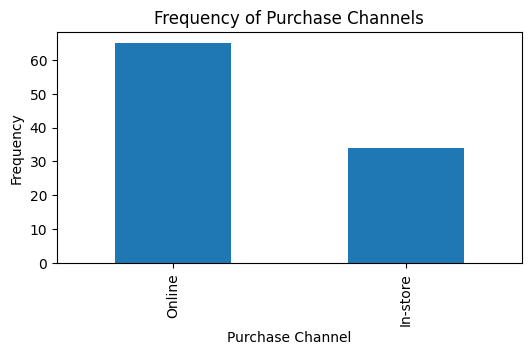

In [50]:
plt.figure(figsize=(6,3))
purchase_channel_freq.plot(kind='bar')
plt.xlabel('Purchase Channel')
plt.ylabel('Frequency')
plt.title('Frequency of Purchase Channels')
plt.show()

## using SEABORN no need to perform purchase freq first etc

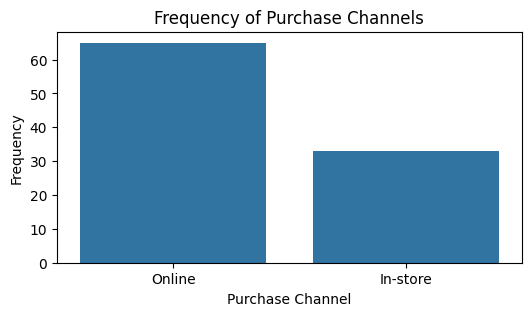

In [51]:
plt.figure(figsize=(6,3))
sns.countplot(x='Purchase_Channel',data=final_data)
plt.xlabel('Purchase Channel')
plt.ylabel('Frequency')
plt.title('Frequency of Purchase Channels')
plt.show()

### STACKET CHART FOR CROSS TABULIZATION

<Figure size 600x300 with 0 Axes>

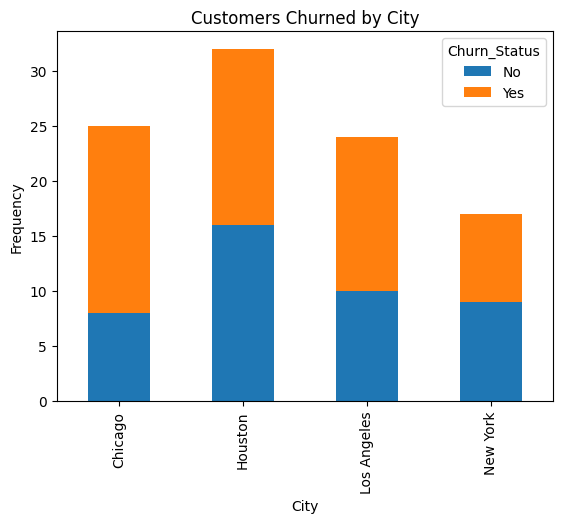

In [52]:
plt.figure(figsize=(6,3))
cross_tab.plot(kind='bar',stacked=True)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Customers Churned by City')
plt.show()

### using SEABORN NO NEED TO PERFORM CROSS TAB INITIALLY

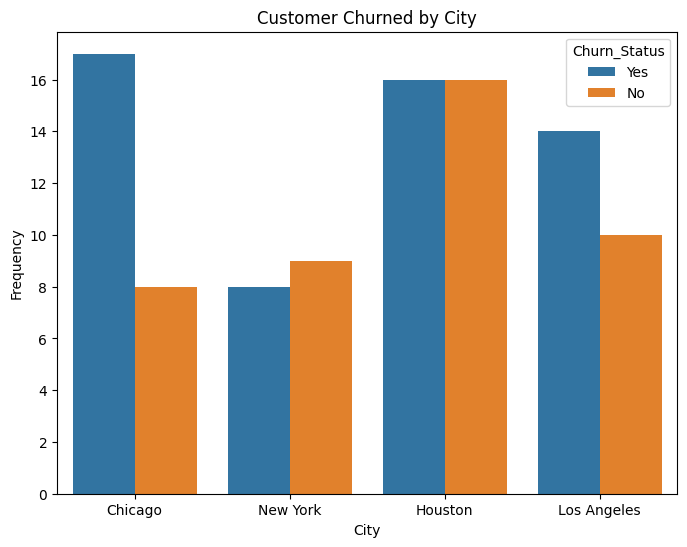

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(x='City', hue='Churn_Status', data=final_data)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Customer Churned by City')
plt.show()

## PIE CHART
PIE CHART FEATURE IS ONLY AVAILABLE IN MATPLOTLIB AND IT WILL BE PERFORMED ON VARIABLE STORED THE PERCENTAGE

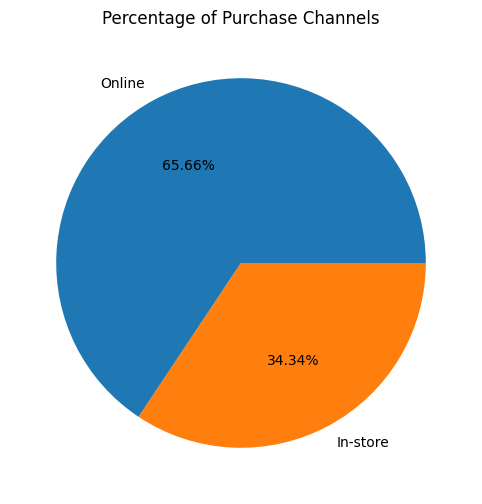

In [54]:
plt.figure(figsize=(8,6))
percen_purchase_channel_freq.plot(kind='pie',autopct='%1.2f%%')
plt.title('Percentage of Purchase Channels')
plt.ylabel('')
plt.show()


## LINECHART
LINE CHART IS PERFORMED ON GROUPBY ANALYSIS IN MATPLOTLIB AND IN SEABON DIRECTLY USING CAT_COL AND VALUE_COL

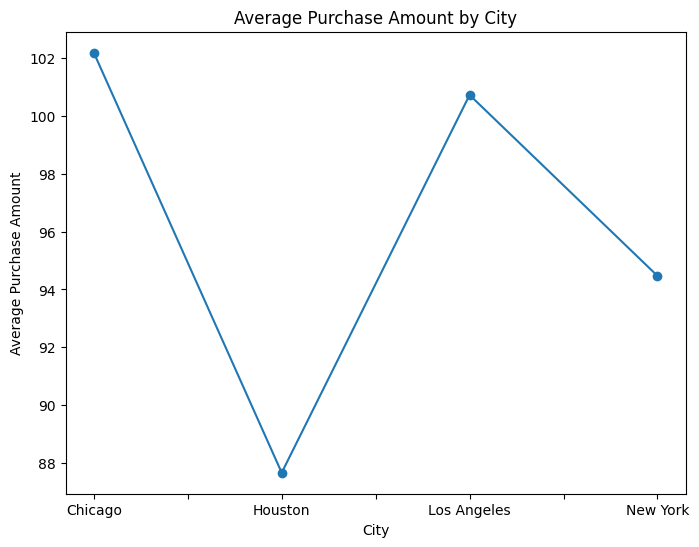

In [55]:
plt.figure(figsize=(8,6))
city_purchase_amount.plot(kind='line',marker='o')
plt.xlabel("City")
plt.ylabel("Average Purchase Amount")
plt.title("Average Purchase Amount by City")
plt.show()

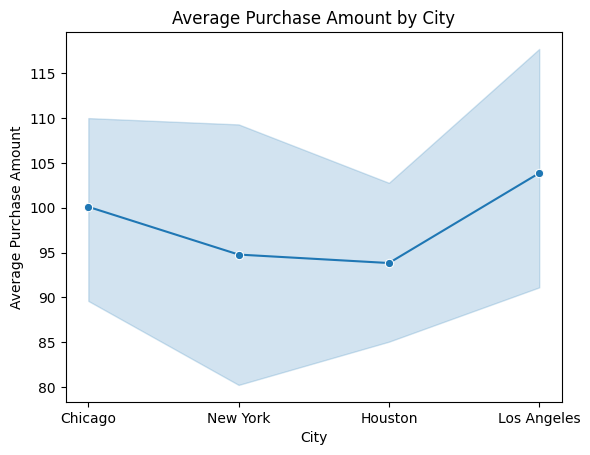

In [56]:
sns.lineplot(x='City',y='Average_Purchase_Amount',data=final_data,marker='o')
plt.xlabel("City")
plt.ylabel("Average Purchase Amount")
plt.title("Average Purchase Amount by City")
plt.show()

## HISTOGRAM:

Text(0.5, 1.0, 'Distribution of Average Purchase Amount')

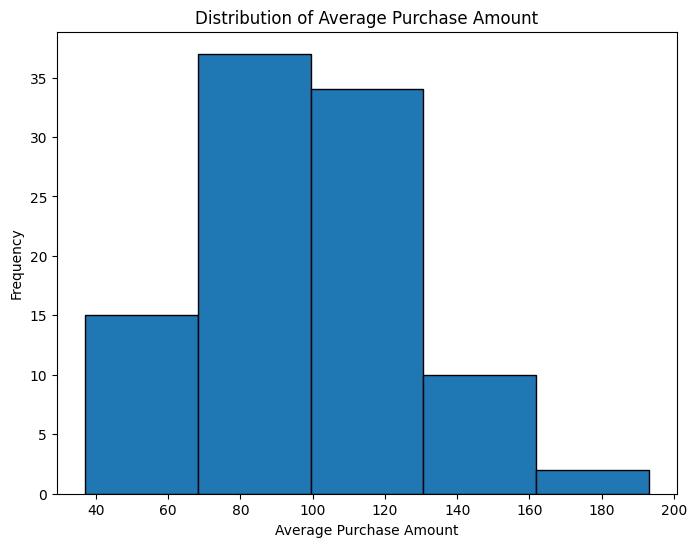

In [57]:
plt.figure(figsize=(8,6))
final_data['Average_Purchase_Amount'].plot(kind='hist',bins=5,edgecolor='black')
plt.xlabel("Average Purchase Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Average Purchase Amount")

Text(0.5, 1.0, 'Distribution of Average Purchase Amount')

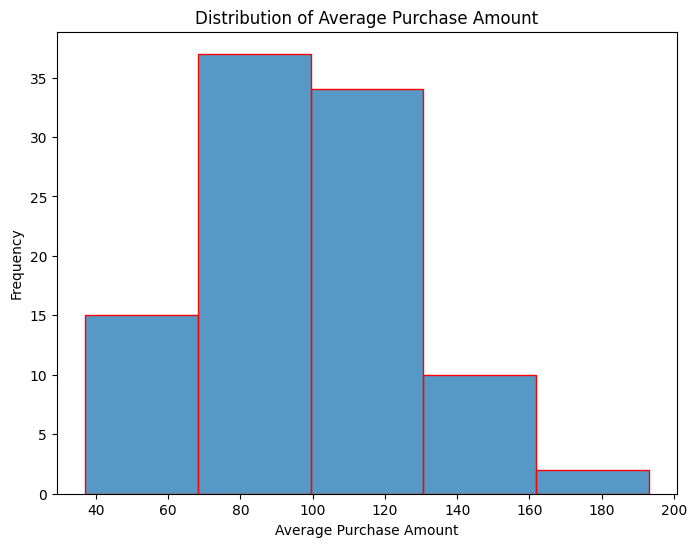

In [58]:
plt.figure(figsize=(8,6))
sns.histplot(final_data['Average_Purchase_Amount'],bins=5,edgecolor='red')
plt.xlabel("Average Purchase Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Average Purchase Amount")

### SCATTER PLOT
IT SHOWS THE REL BETWEEN TWO NUMERIC DATA
ITS BETTER LOOK IS USING SEABORN BECAUSE AUTO TREND LINE WILL APPEAR

Text(0.5, 1.0, 'Frequency of Purchase vs. Average Purchase Amount')

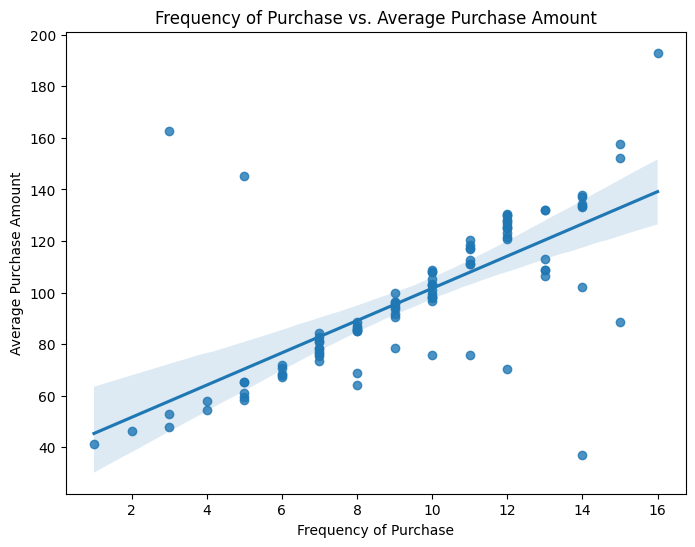

In [59]:
plt.figure(figsize=(8,6))
sns.regplot(x='Frequency_of_Purchases', y='Average_Purchase_Amount', data=final_data)
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Purchase Amount')
plt.title('Frequency of Purchase vs. Average Purchase Amount')

Text(0.5, 1.0, 'Frequency of Purchase vs. Average Purchase Amount')

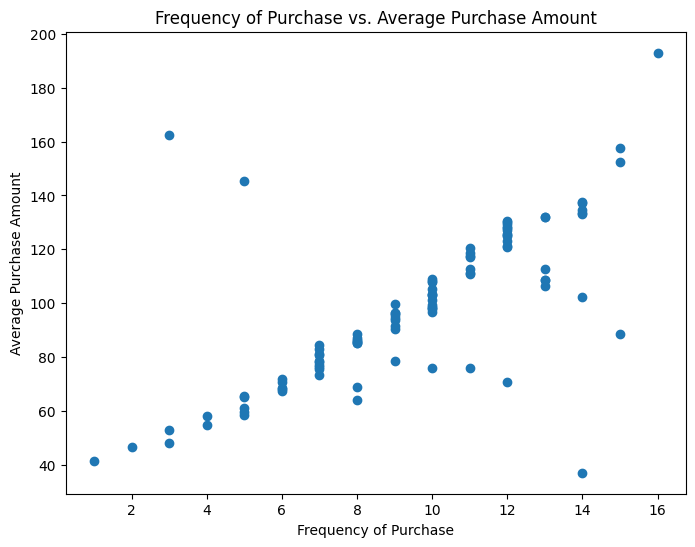

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(final_data['Frequency_of_Purchases'], final_data['Average_Purchase_Amount'])
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Purchase Amount')
plt.title('Frequency of Purchase vs. Average Purchase Amount')

## HEATMAP AND CORRELATION MATRIX
CORRELATION BETWEEN ALL NUMERIC VALUES CAN BE CREATED

In [61]:
numeric_final_data = final_data.select_dtypes(include=np.number)
correl = round(numeric_final_data.corr(), 3)
correl

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
Age,1.000,0.110,0.301,0.170,0.334,-0.048,-0.006,0.065
Income,0.110,1.000,-0.022,0.023,0.068,0.178,0.163,0.162
Frequency_of_Purchases,0.301,-0.022,1.000,0.704,0.762,-0.063,-0.065,-0.066
Average_Purchase_Amount,0.170,0.023,0.704,1.000,0.690,-0.029,-0.145,-0.191
Customer_Lifespan_Months,0.334,0.068,0.762,0.690,1.000,-0.073,-0.013,-0.001
Recency,-0.048,0.178,-0.063,-0.029,-0.073,1.000,0.761,0.743
Frequency_Score,-0.006,0.163,-0.065,-0.145,-0.013,0.761,1.000,0.819
Monetary_Score,0.065,0.162,-0.066,-0.191,-0.001,0.743,0.819,1.000


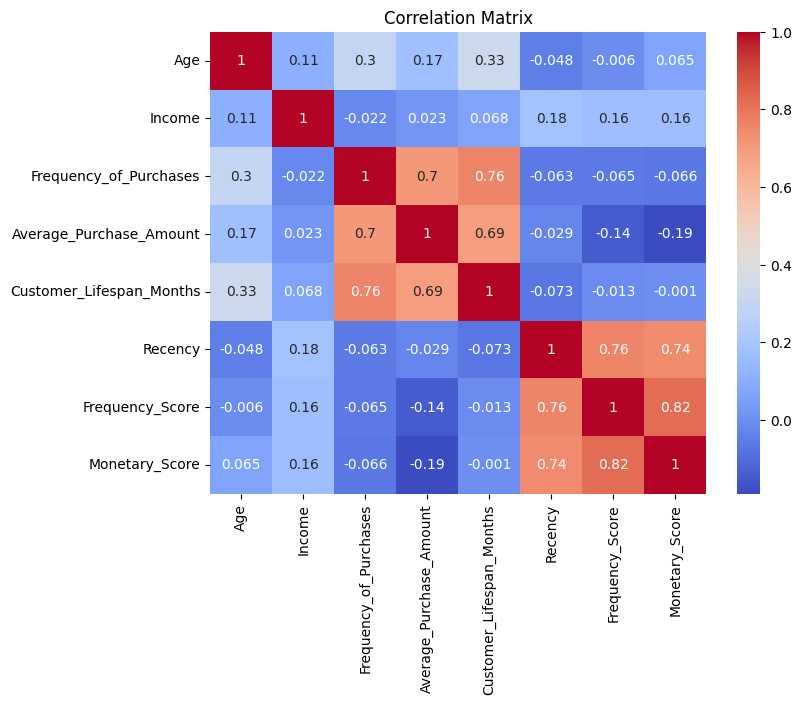

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(correl,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## KDE PLOT
A KDE plot, or Kernel Density Estimate plot, is a method for visualizing the probability density function of a continuous variable. It's often used to see the distribution of data, much like a histogram, but with a smoothed curve rather than distinct bars. It provides a non-parametric estimation of the probability density of a random variable

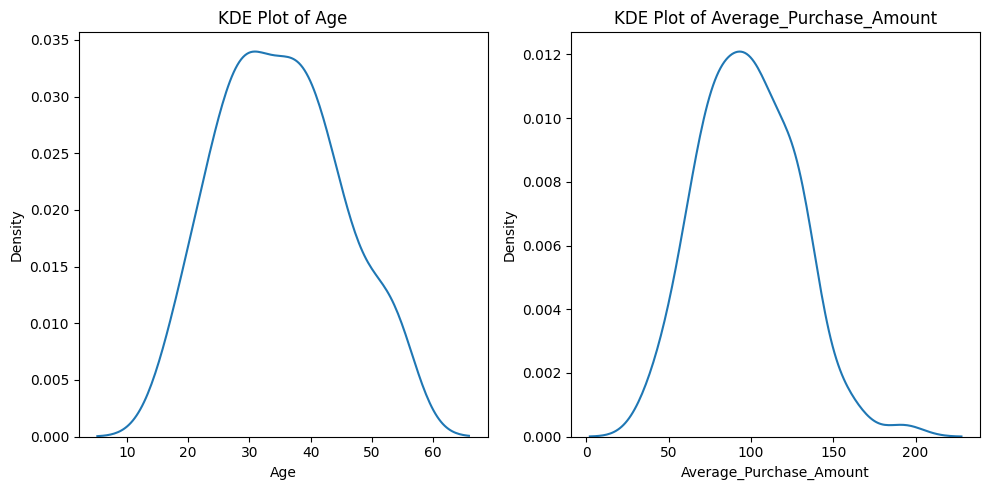

In [63]:
numeric_cols=['Age','Average_Purchase_Amount']
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
for index,col in enumerate(numeric_cols):
  sns.kdeplot(final_data[col],ax=axes[index])
  axes[index].set_title(f'KDE Plot of {col}')
plt.tight_layout()
plt.show()